# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [110]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [111]:
import numpy as np

n_train = len(X_train)
n_test = len(X_test)
image_shape = np.shape(X_train[0])
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [112]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import csv

classes = [str]*n_classes

# Read classes.
with open('signnames.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        classes[int(row['ClassId'])] = row['SignName']

# Visualizations will be shown in the notebook.
%matplotlib inline

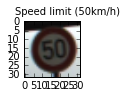

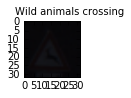

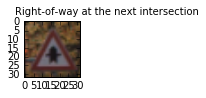

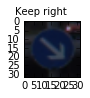

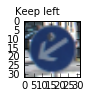

In [59]:
# This cell can be run multiple times to show a different random sample of images from the training set each time.

# Show 5 samples with labels.
for i in range(5):
    index = random.randint(0, n_train)
    image = X_train[index].squeeze()
    signname = classes[y_train[index]]
    plt.figure(figsize=(1, 1))
    plt.suptitle(signname, x = 0, y = 1.1, horizontalalignment = 'left')
    plt.imshow(image)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [113]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

X_train = (X_train.astype(np.float32) - 128) / 256
X_train, y_train = shuffle(X_train, y_train)

X_test = (X_test.astype(np.float32) - 128) / 256

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
I shuffled the data to prevent the order of the input from having an effect on the training of the network. I also normalized the RGB pixel values to range between [-0.5, 0.5)

In [114]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

# Calculate validation set as 20% of training set
n_validation = int(n_train / 5)

# Take the last 20% of the training set (after shuffle) for validation set
X_validation = X_train[n_train - n_validation:]
y_validation = y_train[n_train - n_validation:]

# Update the training set
n_train -= n_validation
X_train = X_train[0:n_train]
y_train = y_train[0:n_train]

In [105]:
# This cell can be run multiple times to double the size of the training set by adding an identical set with random
# brightness changes.
# Using this method actually reduced the performance of the model so results are shown with this cell skipped.
# To use, uncomment all the code.

# Generate training data by randomly changing brightness of each image
# X_train_2 = [(x + (x * (float(random.gauss(0, .1))))) for x in X_train]

# Truncate values at min -0.5, max 0.5
# X_train_2 = np.fmax(X_train_2, -0.5)
# X_train_2 = np.fmin(X_train_2, 0.5)

# Append the generated training data to the original array
# X_train = np.concatenate((X_train, X_train_2))
# y_train = np.concatenate((y_train, y_train))
# n_train *= 2

# Shuffle training data again so the sets are mixed together
# X_train, y_train = shuffle(X_train, y_train)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** I did not set up any testing data besides that which was provided. I took 20% of the training data to use as validation data; this subset is randomly selected as it's taken after the shuffle/preprocessing. I tried generating additional data by creating another copy of the training data set with varying brightness; however, there are several more ways to do so including using Gaussian blur, rotation, dropout (can also be done inside the neural net as shown below), etc. There's a great [prebuilt library](https://github.com/aleju/imgaug) for this. This method actually reduced the model's performance a bit, so I skipped it for the final run-through to hand in this project.

In [115]:
### The starting point for this model is LeNet, but it's adjusted with 3x depth for the input layer to track RGB
### and 3x depth/width for each convolutional/fully connected layer, respectively to be able to track more features.

from tensorflow.contrib.layers import flatten

def LeNet(x, mu, sigma, keep_prob):
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x18.
    conv1_weights = tf.Variable(tf.truncated_normal((5, 5, 3, 18), mean = mu, stddev = sigma))
    conv1_biases = tf.Variable(tf.zeros(18))
    conv1_strides = [1, 1, 1, 1]
    conv1_padding = 'VALID'
    conv1 = tf.nn.conv2d(x, conv1_weights, conv1_strides, conv1_padding) + conv1_biases
    
    # Activation.
    act1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x18. Output = 14x14x18.
    pool1_ksize = (1, 2, 2, 1)
    pool1_strides = (1, 2, 2, 1)
    pool1_padding = 'VALID'
    pool1 = tf.nn.max_pool(act1, pool1_ksize, pool1_strides, pool1_padding)

    # Layer 2: Convolutional. Output = 10x10x48.
    conv2_weights = tf.Variable(tf.truncated_normal((5, 5, 18, 48), mean = mu, stddev = sigma))
    conv2_biases = tf.Variable(tf.zeros(48))
    conv2_strides = [1, 1, 1, 1]
    conv2_padding = 'VALID'
    conv2 = tf.nn.conv2d(pool1, conv2_weights, conv2_strides, conv2_padding) + conv2_biases
    
    # Activation.
    act2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x48. Output = 5x5x48.
    pool2_ksize = (1, 2, 2, 1)
    pool2_strides = (1, 2, 2, 1)
    pool2_padding = 'VALID'
    pool2 = tf.nn.max_pool(act2, pool2_ksize, pool2_strides, pool2_padding)

    # Flatten. Input = 5x5x48. Output = 1200.
    flat = flatten(pool2)
    
    # Dropout
    drop = tf.nn.dropout(flat, keep_prob)

    # Layer 3: Fully Connected. Input = 1200. Output = 360.
    layer3_weights = tf.Variable(tf.truncated_normal((1200, 360), mean = mu, stddev = sigma))
    layer3_biases = tf.Variable(tf.zeros(360))
    layer3 = tf.add(tf.matmul(drop, layer3_weights), layer3_biases)
    
    # Activation.
    act3 = tf.nn.relu(layer3)

    # Layer 4: Fully Connected. Input = 360. Output = 252.
    layer4_weights = tf.Variable(tf.truncated_normal((360, 252), mean = mu, stddev = sigma))
    layer4_biases = tf.Variable(tf.zeros(252))
    layer4 = tf.add(tf.matmul(act3, layer4_weights), layer4_biases)
    
    # Activation.
    act4 = tf.nn.relu(layer4)
    
    # Layer 5: Fully Connected. Input = 252. Output = 43 (len(np.unique(y_train)).
    layer5_weights = tf.Variable(tf.truncated_normal((252, 43), mean = mu, stddev = sigma))
    layer5_biases = tf.Variable(tf.zeros(43))
    logits = tf.add(tf.matmul(act4, layer5_weights), layer5_biases)
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** The final architecture is a modification of the LeNet model: the depth in each convolutional layer was increased 3x to account for RGB information as was the width of each fully-connected layer. The final fully-connected layer's width is the number of classes (43) represented by the data, rather than the 10 classes meant for MNIST. I've also added dropout before the first fully-connected layer to make the learning generalize better to unseen data (validation accuracy - validation set randomly picked before each run).

In [119]:
### Train your model here.
### Feel free to use as many code cells as needed.

# Hyperparameters
EPOCHS=10
BATCH_SIZE = 64
rate = 0.001
mu = 0
sigma = 0.1
keep_prob = 0.6

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
k = tf.placeholder(tf.float32)

logits = LeNet(x, mu, sigma, k)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, k: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, k: keep_prob})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'traffic_sign_classifier')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.948

EPOCH 2 ...
Validation Accuracy = 0.972

EPOCH 3 ...
Validation Accuracy = 0.980

EPOCH 4 ...
Validation Accuracy = 0.985

EPOCH 5 ...
Validation Accuracy = 0.986

EPOCH 6 ...
Validation Accuracy = 0.988

EPOCH 7 ...
Validation Accuracy = 0.989

EPOCH 8 ...
Validation Accuracy = 0.992

EPOCH 9 ...
Validation Accuracy = 0.989

EPOCH 10 ...
Validation Accuracy = 0.990

Model saved


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I used the same optimizer as in the LeNet lab; it worked well for me. Based on the overviews I've read of alternative optimizers, I didn't see a need to change it.

I reduced batch size from 128 as in the LeNet lab to 64 as it gave me slightly better validation accuracy results.

I kept the number of epochs at 10 because that worked fine and the approximate max validation accuracy was reached at around epoch 5 - 7.

I kept the mu and sigma settings from the LeNet lab; small 0-centered weights are a good initialization strategy.

I also added a new hyperparameter for the keep probability for dropout. 90% seemed to work OK, but 60% got consistently higher validation accuracy values on convergence.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I started with the LeNet implementation used in the LeNet lab as the problem space is very similar. I added a depth of 3 to the input to account for the fact that the images are in color. I chose not to convert to grayscale instead because color conveys information in traffic signs (red is often some form of "stop" or "do not enter") so that makes the convnet's job easier. This worked pretty well as a start. Then I extended the data set with a copy of itself with random brightness changes and added dropout to add robustness; this increased my validation accuracy by a couple percent with the addition of more epochs. I did try to increase the depth in the convolutional layers and the width in the fully-connected layers by 6x, but didn't see any improvement at a cost of quite a bit of training speed.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [120]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.950


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** The most difficult thing about these signs is that they don't exactly match the ones in the training set.

The first, the "children crossing" sign, is from a different European country and doesn't exactly match German signs.

The second, the "stop" sign, is seen from a strange angle, and also has a sticker that says "eating animals" affixed to it.

The third, the "no entry" sign, has "happiness" written in the middle bar. It's also shaded by a light on top of it.

The fourth, the "bicycle crossing" sign, is non-standard. The bicycle also doesn't show up well when resized to 32x32. Its shape is similar to the "children crossing" sign.

The fifth, the "20 kph zone" sign, is from a different European country. Instead of the entire sign being circular, the sign is rectangular with the circle and speed limit at the top and the word "Zone" at the bottom. This doesn't match the training set at all.

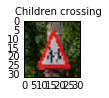

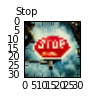

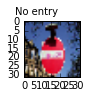

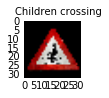

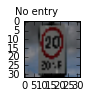

In [121]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
from urllib.request import urlopen
from io import BytesIO
from PIL import Image
from scipy.misc import fromimage

def getimg(url):
    return fromimage(Image.open(BytesIO(urlopen(url).read())).resize((32,32)), mode='RGB')


images = np.zeros((5, 32, 32, 3), np.uint8)

### All photos copyright by their respective owners and shared via Creative Commons
### No photos are distributed with this software; instead, it downloads them into memory to process

# Photo at https://www.flickr.com/photos/alexpanoiu/4968450491/
images[0] = getimg("https://c4.staticflickr.com/5/4153/4968450491_b0f5c4c54c_n.jpg")

# Photo at https://www.flickr.com/photos/alexander_mueller_photolover/21314835873/
images[1] = getimg("https://c2.staticflickr.com/6/5715/21314835873_fbc55200ba_n.jpg")

# Photo at https://www.flickr.com/photos/woolamaloo_gazette/13987016745
images[2] = getimg("https://c2.staticflickr.com/8/7456/13987016745_dcab785931_n.jpg")

# Photo at https://www.flickr.com/photos/56380734@N05/6986126209
images[3] = getimg("https://c2.staticflickr.com/8/7179/6986126209_52ac2b9140_n.jpg")

# Photo at https://www.flickr.com/photos/tim_uk/7717086370
images[4] = getimg("https://c3.staticflickr.com/9/8432/7717086370_a5a085ed0f_n.jpg")

rescaled_images = (images.astype(np.float32) - 128) / 256

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predictions = sess.run(tf.argmax(logits, 1), feed_dict = {x: rescaled_images, k: 1.0})
    for i in range(5):
        signname = classes[predictions[i]]
        plt.figure(figsize=(1, 1))
        plt.suptitle(signname, x = 0, y = 1.1, horizontalalignment = 'left')
        plt.imshow(images[i])

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** The accuracy is only 60% on the captured images compared to 95% on the test dataset; however, the images are specifically chosen to be more difficult (and interesting) as described above in question 6. 

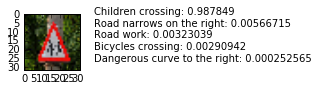

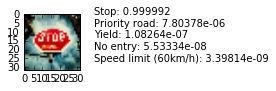

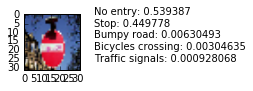

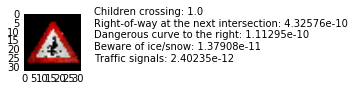

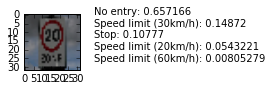

In [122]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    values, indices = sess.run(tf.nn.top_k(tf.nn.softmax(logits), 5), feed_dict = {x: rescaled_images, k: 1.0})
    for i in range(5):
        signname = ""
        for j in range(5):
            signname += classes[indices[i][j]] + ": " + str(values[i][j]) + "\n"
        plt.figure(figsize=(1, 1))
        plt.suptitle(signname, x = 1.1, y = 1.0, horizontalalignment = 'left')
        plt.imshow(images[i])

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** The first sign is correct, and has a confidence of almost 99%. The second sign is correct and has a confidence of almost 100%. The third sign is correct but the model's confidence is just under 54%.

The fourth sign is incorrect, but is very confident of its prediction. To be fair, the sign looks very much like a "Children crossing" sign, especially at this low resolution, because the bicyclist image is not standard in the original photo. The correct prediction is nowhere near the top 5, but all of the confidence values other than the top 1 are very very tiny.

The fourth sign is incorrect with a confidence of almost 66%, but the correct prediction is in the top 5. 3 of the top 5 predictions are speed limit signs.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.